In [63]:
import pandas as pd
import numpy as np
# data understanding libraries
import matplotlib.pyplot as plt # ploting library
%matplotlib inline
from collections import Counter

In [64]:
df = pd.read_csv('data.csv')
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [65]:
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


Data contains no null values, all categorical values are in int64 format.

There are 195 records.

from sklearn.model_selection import train_test_split
x = df.drop('liked',axis=1)
y = df.liked
train_data,test_data = train_test_split(df,test_size=0.2,random_state=1)

The data is not skewed regarding number of liked and disliked songs

# How many liked and disliked songs are there


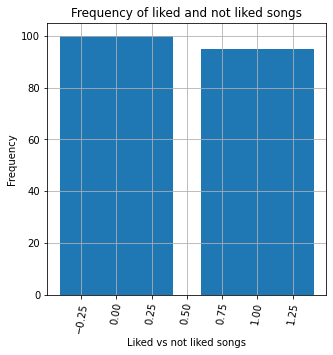

In [67]:
fig, ax = plt.subplots(figsize=(5,5)) # create the plot and specify the figure size
plt.xlabel('Liked vs not liked songs') # specify the x labels
plt.ylabel('Frequency') # specify the y labels
plt.title('Frequency of liked and not liked songs') # specify the plot title
plt.bar(df['liked'].unique(),df['liked'].value_counts()) # create a bar plot
plt.xticks(rotation=80) # rotate the x labels
plt.grid() # show the grid
plt.show() # show the final plot

The data is not skewed regarding number of liked and disliked songs

In [68]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


liked songs are negatively correlated with time duration, hence user likes listening to short songs more.

Liked songs are positively correlated with danceability, loudness and speechiness.

Instrumentalness and danceability are highly negatively correlated

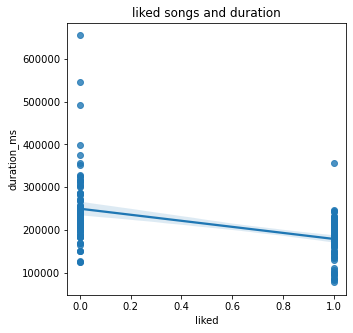

In [69]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.regplot(x=df["liked"] , y=df["duration_ms"] )
plt.title("liked songs and duration")
plt.show()

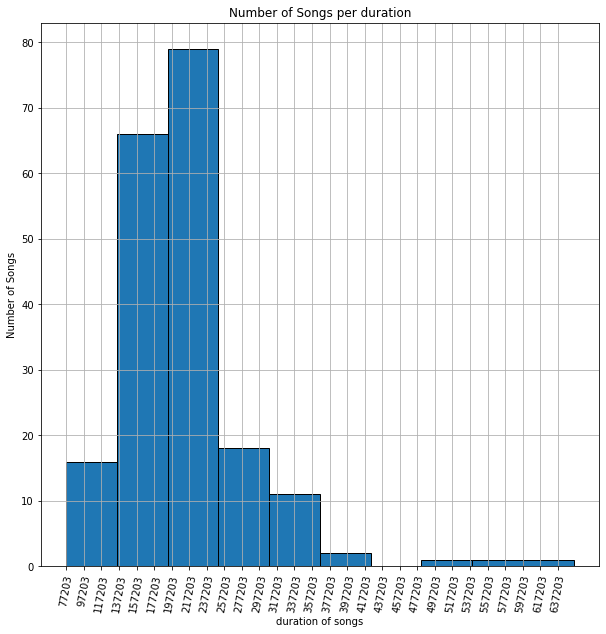

In [129]:

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(df["duration_ms"], edgecolor="k") # output a histogram plot
plt.xlabel('duration of songs')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per duration')
plt.xticks(np.arange(min(df["duration_ms"]), max(df["duration_ms"])+1, 20000.0))
plt.xticks(rotation=80)# change x labels from the defult to the given range
plt.grid()
plt.show()

In [132]:
print("There are " ,len(df[df["duration_ms"]>400000]), " Songs with duration more than 400000 ms.")

There are  3  Songs with duration more than 400000 ms.


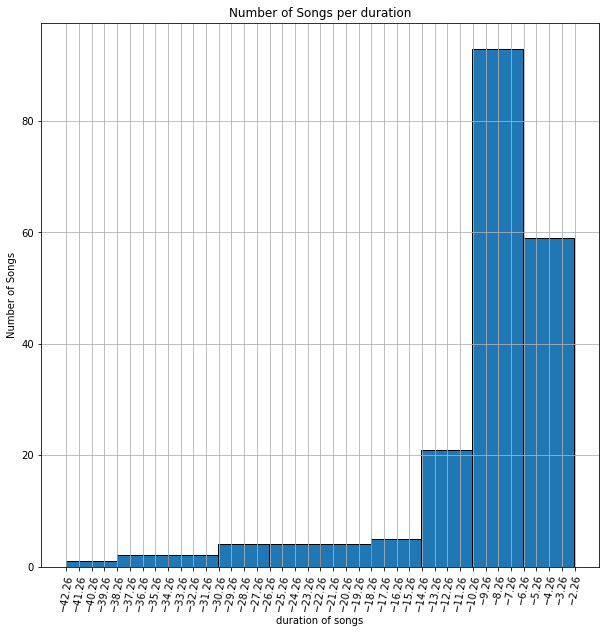

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(df["loudness"], edgecolor="k") # output a histogram plot
plt.xlabel('duration of songs')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per duration')
plt.xticks(np.arange(min(df["loudness"]), max(df["loudness"])+1, 1))
plt.xticks(rotation=80)# change x labels from the defult to the given range
plt.grid()
plt.show()

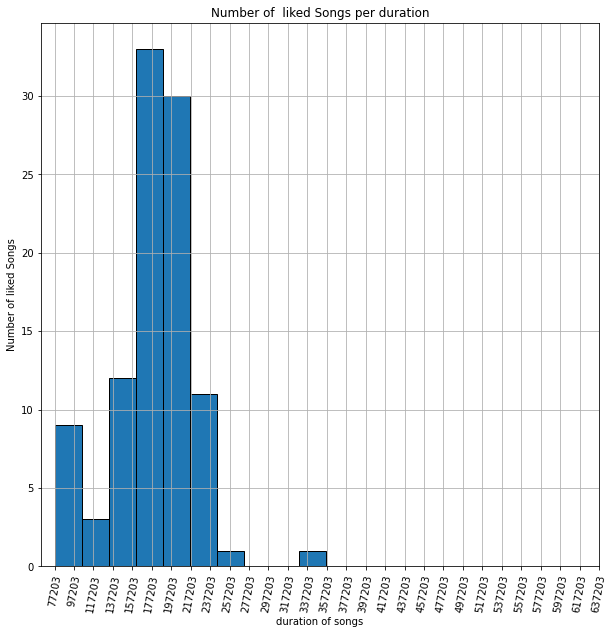

In [131]:

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(df[df["liked"]==1]["duration_ms"], edgecolor="k") # output a histogram plot
plt.xlabel('duration of songs')
plt.ylabel('Number of liked Songs')
plt.title('Number of  liked Songs per duration')
plt.xticks(np.arange(min(df["duration_ms"]), max(df["duration_ms"])+1, 20000.0))
plt.xticks(rotation=80)# change x labels from the defult to the given range
plt.grid()
plt.show()

In [141]:
print("There are " ,len(df[(df["liked"]==1)& (df["duration_ms"]>300000)]), " Songs with duration more than 400000 ms.")

There are  1  Songs with duration more than 400000 ms.


Liked songs by user are mostly under 250000

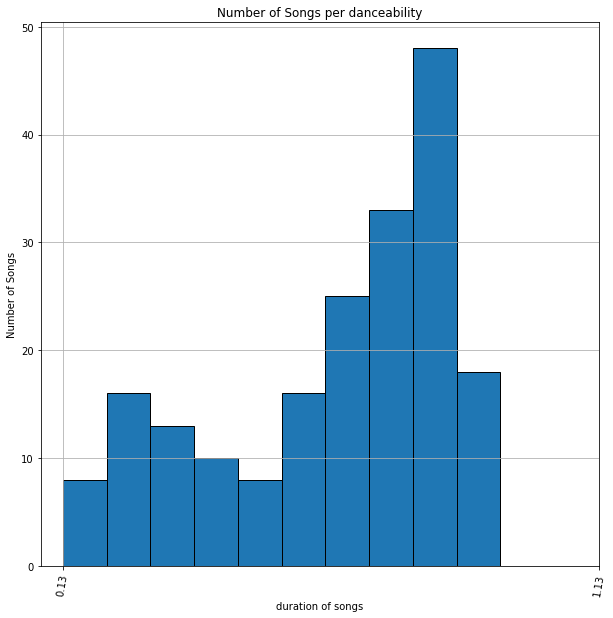

In [73]:


fig, ax = plt.subplots(figsize=(10,10))
plt.hist(df["danceability"], edgecolor="k") # output a histogram plot
plt.xlabel('duration of songs')
plt.ylabel('Number of Songs')
plt.title('Number of Songs per danceability')
plt.xticks(np.arange(min(df["danceability"]), max(df["danceability"])+1, 1))
plt.xticks(rotation=80)# change x labels from the defult to the given range
plt.grid()
plt.show()

Data is right skewed regarding danceability

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
processed_data=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [123]:
processed_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.769903,-0.055628,0.441095,0.417562,-1.080123,-0.843078,0.412263,-0.554830,-0.458413,0.503237,-0.896670,1.266065,0.193658,-1.025978
1,0.580139,0.248888,1.321780,0.235180,-1.080123,1.307549,-0.353462,-0.556955,-0.541666,0.095009,1.079610,0.469229,0.193658,0.974679
2,-1.738685,-2.403485,-1.320274,-2.772810,0.925820,-0.891369,2.103110,2.040507,-0.439492,-1.705687,-1.634621,1.022384,0.193658,-1.025978
3,0.395003,0.376091,-0.733151,0.382222,-1.080123,-0.753156,0.349755,-0.556952,-0.240821,0.330957,-1.114714,-0.062375,0.193658,0.974679
4,0.695849,-0.256069,-1.320274,0.302018,0.925820,0.608158,-0.544112,-0.556955,-0.692088,0.574396,1.214835,-0.472381,0.193658,0.974679


In [124]:
from sklearn.model_selection import train_test_split
x = processed_data.drop('liked',axis=1)
y = df.liked
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)
x_val,x_test,y_val,y_test =train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape

((97, 13), (97,))

In [125]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
lr_clf=clf.fit(x_train,y_train)

In [145]:
from sklearn.metrics import accuracy_score
lr_pred_tr=lr_clf.predict(x_train)
lr_pred_val = lr_clf.predict(x_val)
print(accuracy_score(y_train,lr_pred_tr),accuracy_score(y_val,lr_pred_val))

0.9381443298969072 0.9102564102564102


As accuracy is a good evaluation matrix for this data since the data 
is balanced between liked and not liked, we used accuracy score to test the Model and it returned a good accuracy score of 90% for train and validation data which means this model is good enough 

In [146]:
from sklearn.metrics import classification_report
print(metrics.classification_report(y_val,lr_pred_val))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        75
           1       0.95      0.88      0.91        81

    accuracy                           0.91       156
   macro avg       0.91      0.91      0.91       156
weighted avg       0.91      0.91      0.91       156

